In [1]:
import pandas as pd
import numpy as np

# Modelo Recurrentes con Embeddings a nivel de caracter

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
PROJECT_PATH = "/content/drive/MyDrive/Areas/Going Pro/Diplo Deep Learning/final_nlp/"

In [4]:
df = pd.read_csv(PROJECT_PATH + 'data/acetylcholinesterase_02_bioactivity_data_preprocessed.csv')

In [5]:
df.head()

,molecule_chembl_id,canonical_smiles,standard_value,standard_value_norm,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,750.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,100.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,50000.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,300.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,800.0,6.096910


# Canonical_smiles To secuence

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Utilizando Tokenizer y pad_sequences de keras a nivel de caracter, obtener la entrada tokenizada. Por ejemplo:

**El smiles**:

'C[C@@]12CC[C@H]3[C@]4(C)CCC[C@@]5(C)C(=O)OCC[N+](C)(C)CCCCCCCCC[N+](C)(C)CCOC(=O)[C@]6(C)CCC[C@]7(C)[C@@H]6CC[C@@]68C[C@@H](OC(=O)CCCCCCCCC(=O)O[C@@H]1C[C@@]3(CC[C@@H]45)C2)[C@@](C)(CC[C@@H]76)C8.[Br-].[Br-]'

**Tendría que quedar algo asi (puede que no sea exacto):**

array([ 2, 11,  2, 13, 13, 12,  5,  7,  2,  2, 11,  2, 13, 16, 12, 10, 11,
        2, 13, 12, 15,  3,  2,  4,  2,  2,  2, 11,  2, 13, 13, 12, 23,  3,
        2,  4,  2,  3,  9,  6,  4,  6,  2,  2, 11,  8, 21, 12,  3,  2,  4,
        3,  2,  4,  2,  2,  2,  2,  2,  2,  2,  2,  2, 11,  8, 21, 12,  3,
        2,  4,  3,  2,  4,  2,  2,  6,  2,  3,  9,  6,  4, 11,  2, 13, 12,
       30,  3,  2,  4,  2,  2,  2, 11,  2, 13, 12, 35,  3,  2,  4, 11,  2,
       13, 13, 16, 12, 30,  2,  2, 11,  2, 13, 13, 12, 30, 36,  2, 11,  2,
       13, 13, 16, 12,  3,  6,  2,  3,  9,  6,  4,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  3,  9,  6,  4,  6, 11,  2, 13, 13, 16, 12,  5,  2, 11,
        2, 13, 13, 12, 10,  3,  2,  2, 11,  2, 13, 13, 16, 12, 15, 23,  4,
        2,  7,  4, 11,  2, 13, 13, 12,  3,  2,  4,  3,  2,  2, 11,  2, 13,
       13, 16, 12, 35, 30,  4,  2, 36, 20, 11, 25, 26, 17, 12, 20, 11, 25,
       26, 17, 12], dtype=int32)
       

**Otro ejemplo:**
smiles: 'NC(=O)O'

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 8, 2, 3, 9, 6, 4, 6], dtype=int32)

**Tener en cuenta:**

- Ver cuanta es la máxima longitud para agregar el padding correspondiente
- En el ejemplo se agrego padding a la izquierda

In [7]:
max_len_idx = df['canonical_smiles'].apply(len).argmax()
min_len_idx = df['canonical_smiles'].apply(len).argmin()

In [8]:
X = df['canonical_smiles']
y = df['pIC50']

In [9]:
# Implementar tokenización y guardar en X_seq_pad el dataset tokenizado

In [10]:
#Instancio el tokenizer y lo entreno con X
# filters = '', ya que por defecto filtra caracteres
# lower = False, para que no convierta a minúscula
# char_level = True, para que tome los tokens a nivel de caracter
tokenizer = Tokenizer(filters='', lower=False, char_level=True)
tokenizer.fit_on_texts(X)

# Obtengo el índice de palabras del tokenizador
word_index = tokenizer.word_index

# Codifico oraciones de datos de entrenamiento en secuencias
X_seq = tokenizer.texts_to_sequences(X)

# Obtengo la longitud máxima de la secuencia de entrenamiento
maxlen = max([len(x) for x in X_seq])

# Relleno todas las secuencias para que tengan el largo máximo
pad_type = 'pre'
X_seq_pad = pad_sequences(X_seq, padding=pad_type, maxlen=maxlen)
X_seq_pad = np.array(X_seq_pad)

In [11]:
print(X[0])
print(X_seq_pad[0])

CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  2  2  6  1  5 13 13  3 17  1  7  1  1  1  1  3  6  2  1 10  1  1
  1  1  1 10  4  1  7  4  1  3  9  6  4 24  5]


Ahora todas las secuencias tienen la misma longitud (207)

In [12]:
from collections import Counter
Counter([len(x) for x in X_seq_pad])

Counter({207: 5663})

Resumen de resultados

In [13]:
print("Word index:\n", word_index)
print("\nPadded training sequences:\n", X_seq_pad)
print("\nPadded training shape:\n", X_seq_pad.shape)
print("Training sequences data type", type(X_seq))
print(" Padded training sequences data type", type(X_seq_pad))

Word index:
 {'c': 1, 'C': 2, '(': 3, ')': 4, '1': 5, 'O': 6, '2': 7, 'N': 8, '=': 9, '3': 10, '[': 11, ']': 12, 'n': 13, '@': 14, '4': 15, 'H': 16, '-': 17, '/': 18, 'l': 19, '.': 20, '+': 21, 'F': 22, '5': 23, 'o': 24, 'B': 25, 'r': 26, 'S': 27, '\\': 28, '#': 29, 's': 30, '6': 31, 'I': 32, 'e': 33, 'P': 34, '7': 35, '8': 36, 'i': 37, 'a': 38}

Padded training sequences:
 [[ 0  0  0 ...  4 24  5]
 [ 0  0  0 ...  2  2  5]
 [ 0  0  0 ...  1  1  5]
 ...
 [ 0  0  0 ...  5  6  2]
 [ 0  0  0 ...  1  5  6]
 [ 0  0  0 ...  7  9  6]]

Padded training shape:
 (5663, 207)
Training sequences data type <class 'list'>
 Padded training sequences data type <class 'numpy.ndarray'>


# Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_seq_pad, y, test_size=0.2, random_state=42)

In [16]:
len(X_train), len(y_train), len(X_test)

(4530, 4530, 1133)

# Data Augmentation

In [17]:
# Anexo a X_train el mismo dataset, pero con los valores espejados
X_train = np.vstack([X_train, X_train[:,::-1]])
X_train.shape

(9060, 207)

In [18]:
y_train = np.hstack([y_train, y_train])
y_train.shape

(9060,)

# Network Model

In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional, Dropout, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import backend as K

In [20]:
# Métrica

def R2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [21]:
# vocab_size = # Completar largo del vocabulario
vocab_size = len(word_index)
vocab_size

38

In [22]:
max_sequence_len = X_seq_pad.shape[1]
max_sequence_len

207

# Armar modelo en keras de LSTM
El de abajo es un ejemplo propuesto pero puede armar otro similar (siempre con LSTM o GRU)

In [23]:
"""
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
embedding (Embedding)        (None, 207, 64)           2496      
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               132000    
_________________________________________________________________
dense (Dense)                (None, 50)                10050     
_________________________________________________________________
batch_normalization (BatchNo (None, 50)                200       
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
=================================================================
Total params: 144,797
Trainable params: 144,697
Non-trainable params: 100
_________________________________________________________________
"""
pass

## Arquitectura general
### Emb>Bi(LSTM)>Dense>Dropout>Activ(Relu)>Dense(1,linear)

In [24]:
# Defino funciones para crear modelos y probar con distintos hiperparámetros más rápido.
def create_model(cells, emb_size):
  return_sequences = False
  model = Sequential()
  model.add(Embedding(vocab_size+1, emb_size, input_length=max_sequence_len))
  model.add(Bidirectional(LSTM(cells, return_state=False, return_sequences=return_sequences, activation='tanh')))
  model.add(Dense(50, activation='linear'))
  model.add(Dropout(0.8))
  model.add(Activation('relu'))
  model.add(Dense(1, activation='linear'))
  print(model.summary())
  return model

## Funciones auxiliares para compilar, entrenar, evaluar y guardar el modelo

In [25]:
def compile_train(model):
  model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mse', metrics=[R2])
  # mcp = ModelCheckpoint(PROJECT_PATH + 'models/best_model_{epoch}', save_best_only=True, save_format="h5")
  history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), callbacks=[])
  return history, model

def score_model(model, X, y):
  y_pred = model.predict(X_test)
  r2 = 1 - ((y_test.values - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()
  print(f'R2: {r2}')
  return r2

def save_model(model, path):
  model.save(PROJECT_PATH + 'models/lstm/' + path + '.h5' )

## Pruebo modelos con distintos tamaños de embeddings

### Emb(207,64)>Bi(LSTM(100, tanh))>Dense(50,linear)>Dropout(0.8)>Activ(Relu)>Dense(1,linear) = 0.635

In [26]:
cells = 100
emb_size = 64
name = 'emb_64-bi_lstm_100_tanh-dense_50_linear-drop_80-activ_relu-dense_1'
model = create_model(cells, emb_size)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 207, 64)           2496      
                                                                 
 bidirectional (Bidirectiona  (None, 200)              132000    
 l)                                                              
                                                                 
 dense (Dense)               (None, 50)                10050     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                        

In [27]:
history, model = compile_train(model)

Epoch 1/100
71/71 [==============================] - 11s 42ms/step - loss: 9.1880 - R2: -2.4688 - val_loss: 2.9916 - val_R2: -0.0096
Epoch 2/100
71/71 [==============================] - 3s 39ms/step - loss: 7.1059 - R2: -1.7911 - val_loss: 3.1291 - val_R2: -0.0594
Epoch 3/100
71/71 [==============================] - 2s 31ms/step - loss: 6.8541 - R2: -1.6900 - val_loss: 3.8319 - val_R2: -0.3032
Epoch 4/100
71/71 [==============================] - 2s 30ms/step - loss: 6.7065 - R2: -1.6318 - val_loss: 3.6074 - val_R2: -0.2262
Epoch 5/100
71/71 [==============================] - 2s 31ms/step - loss: 6.6314 - R2: -1.6083 - val_loss: 3.1670 - val_R2: -0.0738
Epoch 6/100
71/71 [==============================] - 2s 30ms/step - loss: 6.4354 - R2: -1.5230 - val_loss: 3.1291 - val_R2: -0.0613
Epoch 7/100
71/71 [==============================] - 2s 30ms/step - loss: 6.4281 - R2: -1.5123 - val_loss: 3.2394 - val_R2: -0.0997
Epoch 8/100
71/71 [==============================] - 2s 30ms/step - loss: 6

In [28]:
r2 = score_model(model, X_test, y_test)

R2: 0.6349910159868131


In [29]:
save_model(model, name)

#### Score

In [30]:
r2
# 0.4984533246797399

0.6349910159868131

### Emb(207,32)>Bi(LSTM(100, tanh))>Dense(50,linear)>Dropout(0.8)>Activ(Relu)>Dense(1,linear) = 0.63

In [ ]:
cells = 100
emb_size = 32
name = 'emb_32-bi_lstm_100_tanh-dense_50_linear-drop_80-activ_relu-dense_1'
model = create_model(cells, emb_size)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 207, 32)           1248      
                                                                 
 bidirectional_8 (Bidirectio  (None, 200)              106400    
 nal)                                                            
                                                                 
 dense_21 (Dense)            (None, 128)               25728     
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                      

In [ ]:
history, model = compile_train(model)

Epoch 1/100
71/71 [==============================] - 6s 40ms/step - loss: 9.7567 - R2: -2.7573 - val_loss: 3.6632 - val_R2: -0.2442
Epoch 2/100
71/71 [==============================] - 2s 29ms/step - loss: 7.2582 - R2: -1.8766 - val_loss: 3.6945 - val_R2: -0.2551
Epoch 3/100
71/71 [==============================] - 2s 29ms/step - loss: 6.8995 - R2: -1.7081 - val_loss: 3.5960 - val_R2: -0.2213
Epoch 4/100
71/71 [==============================] - 2s 29ms/step - loss: 6.8155 - R2: -1.6939 - val_loss: 3.3290 - val_R2: -0.1292
Epoch 5/100
71/71 [==============================] - 2s 29ms/step - loss: 6.6748 - R2: -1.6236 - val_loss: 3.3101 - val_R2: -0.1232
Epoch 6/100
71/71 [==============================] - 2s 29ms/step - loss: 6.7360 - R2: -1.6451 - val_loss: 2.8772 - val_R2: 0.0270
Epoch 7/100
71/71 [==============================] - 3s 38ms/step - loss: 6.4250 - R2: -1.5122 - val_loss: 3.5095 - val_R2: -0.1930
Epoch 8/100
71/71 [==============================] - 2s 35ms/step - loss: 6.2

In [ ]:
save_model(model, name)

#### Score

In [ ]:
r2 = score_model(model, X_test, y_test)

R2: 0.6297853636811848


### Emb(207,16)>Bi(LSTM(100, tanh))>Dense(50,linear)>Dropout(0.8)>Activ(Relu)>Dense(1,linear) = 0.572

In [31]:
cells = 100
emb_size = 16
name = 'emb_16-bi_lstm_100_tanh-dense_50_linear-drop_80-activ_relu-dense_1'
model = create_model(cells, emb_size)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 207, 16)           624       
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              93600     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 50)                10050     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 activation_1 (Activation)   (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                      

In [32]:
history, model = compile_train(model)

Epoch 1/100
71/71 [==============================] - 6s 39ms/step - loss: 10.5081 - R2: -3.0948 - val_loss: 5.4110 - val_R2: -0.8454
Epoch 2/100
71/71 [==============================] - 2s 26ms/step - loss: 8.3873 - R2: -2.2746 - val_loss: 3.7950 - val_R2: -0.2898
Epoch 3/100
71/71 [==============================] - 2s 27ms/step - loss: 8.1672 - R2: -2.1987 - val_loss: 3.7848 - val_R2: -0.2864
Epoch 4/100
71/71 [==============================] - 2s 26ms/step - loss: 7.9955 - R2: -2.1437 - val_loss: 3.4698 - val_R2: -0.1779
Epoch 5/100
71/71 [==============================] - 2s 26ms/step - loss: 7.7775 - R2: -2.0781 - val_loss: 4.0293 - val_R2: -0.3714
Epoch 6/100
71/71 [==============================] - 2s 26ms/step - loss: 7.6206 - R2: -2.0189 - val_loss: 4.1948 - val_R2: -0.4285
Epoch 7/100
71/71 [==============================] - 2s 27ms/step - loss: 7.4632 - R2: -1.9330 - val_loss: 3.4208 - val_R2: -0.1619
Epoch 8/100
71/71 [==============================] - 2s 27ms/step - loss: 7

In [33]:
save_model(model, name)

#### Score

In [34]:
r2 = score_model(model, X_test, y_test)

R2: 0.5720379369522635


### Emb(207,8)>Bi(LSTM(100, tanh))>Dense(50,linear)>Dropout(0.8)>Activ(Relu)>Dense(1,linear) = 0.589

In [35]:
cells = 100
emb_size = 8
name = 'emb_8-bi_lstm_100_tanh-dense_50_linear-drop_80-activ_relu-dense_1'
model = create_model(cells, emb_size)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 207, 8)            312       
                                                                 
 bidirectional_2 (Bidirectio  (None, 200)              87200     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 50)                10050     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 activation_2 (Activation)   (None, 50)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                      

In [36]:
history, model = compile_train(model)

Epoch 1/100
71/71 [==============================] - 6s 38ms/step - loss: 10.0621 - R2: -3.0224 - val_loss: 3.5069 - val_R2: -0.1902
Epoch 2/100
71/71 [==============================] - 2s 26ms/step - loss: 8.1138 - R2: -2.1814 - val_loss: 4.5843 - val_R2: -0.5616
Epoch 3/100
71/71 [==============================] - 2s 27ms/step - loss: 7.8031 - R2: -2.0727 - val_loss: 4.0080 - val_R2: -0.3636
Epoch 4/100
71/71 [==============================] - 2s 26ms/step - loss: 7.9959 - R2: -2.1384 - val_loss: 3.4778 - val_R2: -0.1814
Epoch 5/100
71/71 [==============================] - 2s 26ms/step - loss: 7.6222 - R2: -2.0129 - val_loss: 3.2599 - val_R2: -0.1069
Epoch 6/100
71/71 [==============================] - 2s 26ms/step - loss: 7.1465 - R2: -1.8085 - val_loss: 3.5380 - val_R2: -0.2013
Epoch 7/100
71/71 [==============================] - 2s 26ms/step - loss: 7.2228 - R2: -1.8460 - val_loss: 3.6171 - val_R2: -0.2288
Epoch 8/100
71/71 [==============================] - 2s 26ms/step - loss: 6

In [37]:
save_model(model, name)

#### Score

In [38]:
r2 = score_model(model, X_test, y_test)

R2: 0.5885856133127247


## Variaciones alrededor del modelo que con tamaño de embedding que mejor performó (64)

### Con mayor cantidad de capas densas y dropout

#### Emb(207,64)>Bi(LSTM(100, tanh))>Dense(128-64-32,linear) + Dropout 0.80 >Dense(1,linear) = 0.555

In [52]:
# Defino funciones para crear modelos y probar con distintos hiperparámetros más rápido.
def create_model(cells, emb_size):
  return_sequences = False
  model = Sequential()
  model.add(Embedding(vocab_size+1, emb_size, input_length=max_sequence_len))
  model.add(Bidirectional(LSTM(cells, return_state=False, return_sequences=return_sequences, activation='tanh')))
  model.add(Dense(128, activation='linear'))
  model.add(Dropout(0.8))
  model.add(Dense(64, activation='linear'))
  model.add(Dropout(0.8))
  model.add(Dense(32, activation='linear'))
  model.add(Dropout(0.8))
  model.add(Dense(1, activation='linear'))
  print(model.summary())
  return model

In [59]:
cells = 100
emb_size = 64
name = 'emb_64-bi_lstm_100_tanh-dense_(128-64-32)_linear_dropout_0.8-dense_1'
model = create_model(cells, emb_size)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 207, 64)           2496      
                                                                 
 bidirectional_9 (Bidirectio  (None, 200)              132000    
 nal)                                                            
                                                                 
 dense_25 (Dense)            (None, 128)               25728     
                                                                 
 dropout_15 (Dropout)        (None, 128)               0         
                                                                 
 dense_26 (Dense)            (None, 64)                8256      
                                                                 
 dropout_16 (Dropout)        (None, 64)                0         
                                                      

In [54]:
history, model = compile_train(model)

Epoch 1/100
71/71 [==============================] - 7s 47ms/step - loss: 16.4320 - R2: -5.4807 - val_loss: 7.5720 - val_R2: -1.5864
Epoch 2/100
71/71 [==============================] - 2s 31ms/step - loss: 10.1139 - R2: -2.9918 - val_loss: 3.6213 - val_R2: -0.2318
Epoch 3/100
71/71 [==============================] - 2s 31ms/step - loss: 8.3391 - R2: -2.2847 - val_loss: 4.3441 - val_R2: -0.4814
Epoch 4/100
71/71 [==============================] - 2s 30ms/step - loss: 7.5320 - R2: -1.9585 - val_loss: 3.7257 - val_R2: -0.2681
Epoch 5/100
71/71 [==============================] - 2s 31ms/step - loss: 6.9387 - R2: -1.7313 - val_loss: 4.9501 - val_R2: -0.6894
Epoch 6/100
71/71 [==============================] - 2s 30ms/step - loss: 6.7015 - R2: -1.6345 - val_loss: 3.4436 - val_R2: -0.1715
Epoch 7/100
71/71 [==============================] - 2s 31ms/step - loss: 6.4117 - R2: -1.5071 - val_loss: 3.3740 - val_R2: -0.1478
Epoch 8/100
71/71 [==============================] - 2s 31ms/step - loss: 

In [55]:
save_model(model, name)

##### Score

In [56]:
r2 = score_model(model, X_test, y_test)

R2: 0.5552154898541601


#### Emb(207,64)>Bi(LSTM(100, tanh))>(Dense(512,linear)-BatchNorm-Dropout80)>x2>Dense(1,linear) = 0.717

In [125]:
# Defino funciones para crear modelos y probar con distintos hiperparámetros más rápido.
def create_model(cells, emb_size):
  return_sequences = False
  model = Sequential()
  model.add(Embedding(vocab_size+1, emb_size, input_length=max_sequence_len))
  model.add(Bidirectional(LSTM(cells, return_state=False, return_sequences=return_sequences, activation='tanh')))
  model.add(Dense(512, activation='linear'))
  model.add(BatchNormalization())
  model.add(Dropout(0.8))
  model.add(Dense(512, activation='linear'))
  model.add(BatchNormalization())
  model.add(Dropout(0.8))
  model.add(Dense(1, activation='linear'))
  print(model.summary())
  return model

In [126]:
cells = 100
emb_size = 64
model = create_model(cells, emb_size)

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_33 (Embedding)    (None, 207, 64)           2496      
                                                                 
 bidirectional_33 (Bidirecti  (None, 200)              132000    
 onal)                                                           
                                                                 
 dense_131 (Dense)           (None, 512)               102912    
                                                                 
 batch_normalization_38 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dropout_45 (Dropout)        (None, 512)               0         
                                                                 
 dense_132 (Dense)           (None, 512)             

In [127]:
history, model = compile_train(model)

Epoch 1/100
71/71 [==============================] - 18s 45ms/step - loss: 33.6449 - R2: -12.1950 - val_loss: 17.3959 - val_R2: -4.9463
Epoch 2/100
71/71 [==============================] - 2s 33ms/step - loss: 18.3500 - R2: -6.2664 - val_loss: 5.0112 - val_R2: -0.7079
Epoch 3/100
71/71 [==============================] - 2s 33ms/step - loss: 10.8350 - R2: -3.3114 - val_loss: 4.5174 - val_R2: -0.5388
Epoch 4/100
71/71 [==============================] - 2s 32ms/step - loss: 7.6636 - R2: -2.0138 - val_loss: 4.2525 - val_R2: -0.4474
Epoch 5/100
71/71 [==============================] - 2s 33ms/step - loss: 6.2121 - R2: -1.4321 - val_loss: 3.4606 - val_R2: -0.1638
Epoch 6/100
71/71 [==============================] - 2s 33ms/step - loss: 5.1485 - R2: -1.0040 - val_loss: 2.8578 - val_R2: 0.0410
Epoch 7/100
71/71 [==============================] - 2s 32ms/step - loss: 4.4964 - R2: -0.7553 - val_loss: 3.1603 - val_R2: -0.0705
Epoch 8/100
71/71 [==============================] - 2s 32ms/step - los

In [130]:
name = 'emb_64-bi_lstm_100_tanh-dense_512_linear_BN_Drop80x2-dense_1_linear'
save_model(model, name)

##### Score

In [129]:
r2 = score_model(model, X_test, y_test)

R2: 0.7171932120939214


# Load model (solo si se grabo el modelo)

¿Hasta que valores de r2 logró?

El valor de R2 máximo lo logré con la siguiente red:
- Emb(207,64)>Bi(LSTM(100, tanh))>[Dense(512,linear)-BatchNorm-Dropout80]x2>Dense(1,linear) = 0.717

In [138]:
'''
Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 embedding_33 (Embedding)    (None, 207, 64)           2496      
                                                                 
 bidirectional_33 (Bidirecti  (None, 200)              132000    
 onal)                                                           
                                                                 
 dense_131 (Dense)           (None, 512)               102912    
                                                                 
 batch_normalization_38 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dropout_45 (Dropout)        (None, 512)               0         
                                                                 
 dense_132 (Dense)           (None, 512)               262656    
                                                                 
 batch_normalization_39 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dropout_46 (Dropout)        (None, 512)               0         
                                                                 
 dense_133 (Dense)           (None, 1)                 513       
                                                                 
=================================================================
Total params: 504,673
Trainable params: 502,625
Non-trainable params: 2,048
________________________________________________________________
'''
pass

In [131]:
from tensorflow.keras.models import load_model

In [132]:
name = 'emb_64-bi_lstm_100_tanh-dense_512_linear_BN_Drop80x2-dense_1_linear'

In [133]:
model_loaded = load_model(PROJECT_PATH + 'models/lstm/'+ name + '.h5', custom_objects={'R2': R2})

In [134]:
y_pred = model_loaded.predict(X_test)

In [135]:
r2 = 1 - ((y_test.values - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()
r2

0.7171932120939214

# Evaluación

<function matplotlib.pyplot.show(*args, **kw)>

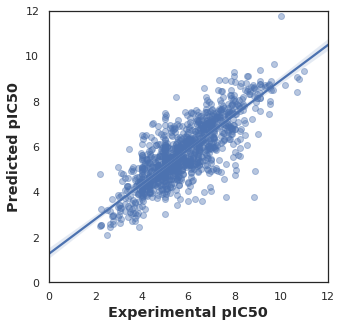

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show